## Bil 470 Machine Learning
### Homework 2
#### Fatih Furkan HAS - 141101024

In [190]:
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np

Read data from file with pandas

In [191]:
data = pd.read_csv('wdbc.data')

Look the data's first 5 rows

In [192]:
data.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Our dataset does not have header but pandas readed first row as header, we can change this with ignoring header, then look the first 5 rows of data again

In [193]:
data = pd.read_csv('wdbc.data', header=None) #read data from csv file and ignore header
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


There is a column that contains id of row, we can drop this column.
After that 'B' and 'M' values can be replaced with 0 and 1 for easier processing.

In [194]:
data = data.drop(data.columns[[0]], axis=1) #drop 0. column because it contains ID, it is not neccessary
data.replace('B', 0, inplace=True) #replace B values with 0
data.replace('M', 1, inplace=True) #replace M values with 1
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


If you look at the dataset you'll notice that it is not scaled well. For instance the 6th and 7 column have values between 0 and 1, while most of the rest of the columns have higher values. Therefore, before training the algorithm, we will need to scale our data down.

In [195]:
data.describe() #we check the data

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Split data's feature and labels

In [196]:
features = data.loc[:, 2:] #get columns except labels column
labels = data.loc[:, 1] #get labels column

Standardize the data as mentioned above with StandarScaler

In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features) #standartize the features

Split dataset as train and test, we will use training set for training the model and test set for analyzing the accuracy of model

In [198]:
from sklearn.model_selection import train_test_split
np.random.seed(15)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2) #split dataset as train(%80) and test(%20)

Check the dataset features and labels

In [199]:
print(features)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [200]:
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [249]:
kfold = KFold(n_splits=10) #create 10-fold for cross-validtaion, do not shuffle 
                                          #data beacuse we use this fold for every model

Define grid search for optimizing parameters of models. This method also prints best parameters of given model. Returns the GridSearch results

In [201]:
from sklearn.model_selection import GridSearchCV
def grid_search_model(model, X, Y, parameters, cv):
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=cv) #parameter tuning with grid search cross-validation
    CV_model.fit(X, Y) #fit the model
    CV_model.cv_results_
    print("Best Score:", CV_model.best_score_," / Best parameters:", CV_model.best_params_)
    return CV_model

SVM is too sensitive to 2 values these are C value and gamma value. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. The other one is gamma value, if gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting. When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. These values needed to be optimized. Np.linspace creates a list that contains 10 values from 0.001 to 100. These values will be used for optimizing C and gamma values.

In [202]:
param_grid = {'C': np.linspace(0.001, 100, 10),
             'gamma': np.linspace(0.001, 100, 10)} #linspace returns 10 numbers from 0.001 to 100

Learning curve is plot of error vs train set size. Learning curve shows how error changes as the training set size increases. In this case, our error rate is accuracy.
The code is taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [203]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
def learning_curve_model(model, title, X, Y, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve of " + title)
    plt.xlabel("Training examples")
    plt.ylabel("Error")

    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring='accuracy')

    train_scores = 1 - train_scores #our error is 1 - accuracy
    test_scores  = 1 - test_scores #our error is 1 - accuracy
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    
    train_scores_error = 1 - train_scores_mean
    test_scores_error = 1 - test_scores_mean
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation error")
                     
    plt.legend(loc="best")
    return plt

We use grid search for parameter tuning, grid search tries given parameters and returns the best parameter for the model and data. We also use 10-fold.

In [204]:
from sklearn.svm import SVC
grid_search_svm = grid_search_model(SVC(), X_train, y_train, param_grid, kfold) #

Best Score: 0.9868131868131869  / Best parameters: {'C': 33.333999999999996, 'gamma': 0.001}


As we can see training error increases with increasing number of sample size, and cross-validation eror decreases with sample size. If we analyze the plot, we can see there is small gap between trainin error and cross-validation error. A narrow gap indicates low variance. If the training error is very low, it means that the training data is fitted very well by the estimated model. If the model fits the training data very well, it means it has low bias with respect to that set of data. If the training error is high, it means that the training data is not fitted well enough by the estimated model. If the model fails to fit the training data well, it means it has high bias with respect to that set of data.
<img src="https://www.dataquest.io/blog/content/images/2017/12/low_high_var.png">
<img src="https://www.dataquest.io/blog/content/images/2017/12/low_high_bias.png">
<center>Images are taken from <a href="https://www.dataquest.io/blog/learning-curves-machine-learning/">dataquest</a></center>

<module 'matplotlib.pyplot' from '/usr/lib/python3.7/site-packages/matplotlib/pyplot.py'>

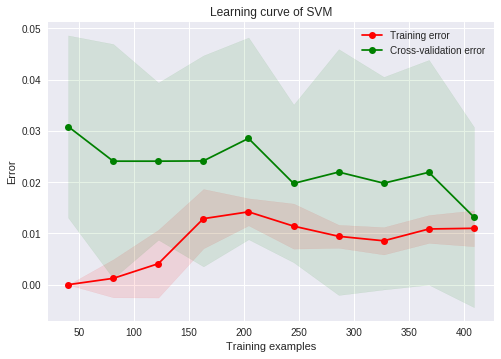

In [250]:
svc = SVC(C=grid_search_svm.best_params_['C'], gamma=grid_search_svm.best_params_['gamma'])
train_size=np.linspace(0.1,1, 10) #10 observation point for plot
learning_curve_model(svc, "SVM", X_train, y_train, kfold, train_size)

In [248]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test) #predict our test data
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #calculate accuracy

Accuracy: 0.956140350877193


Set some parameters for parameter tuning with grid search. I only tried with grid_params but the result was not good and I added random_grid for increasing parameter space. It gives better result than grid_param. For example, higher estimator gives better result but it can slow down training proccess.

In [235]:
grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'bootstrap': [True, False]
}
#firstly I choose some parameters differently but it's runtime was so long and after that I tried parameters like that
n_estimators = [100, 200]
max_features = [1, 2, 3]
max_depth = [50, 60, 80, 100]
min_samples_split = [5, 6, 7, 8]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [236]:
from sklearn.ensemble import RandomForestClassifier

In [237]:
grid_search_random_forest = grid_search_model(RandomForestClassifier(), X_train, y_train, random_grid, kfold)

Best Score: 0.9714285714285714  / Best parameters: {'bootstrap': False, 'max_depth': 60, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Look the parameters choosen from grid search for random forest model

In [238]:
grid_search_random_forest.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [239]:
n_estimators = grid_search_random_forest.best_params_['n_estimators']
max_features = grid_search_random_forest.best_params_['max_features']
max_depth = grid_search_random_forest.best_params_['max_depth']
min_samples_split = grid_search_random_forest.best_params_['min_samples_split']
min_samples_leaf = grid_search_random_forest.best_params_['min_samples_leaf']
bootstrap = grid_search_random_forest.best_params_['bootstrap']

We gave RandomForestClassifier with founded parameters with grid search cross-validation, and draw learning curve.
There is wider gap between training score and cross-validation score than SVM's learning curve, the wider the gap indicates greater variance than SVM, but our training error is smaller than SVM's training error it indicates that Random Forest's bias is smaller than SVM.

<module 'matplotlib.pyplot' from '/usr/lib/python3.7/site-packages/matplotlib/pyplot.py'>

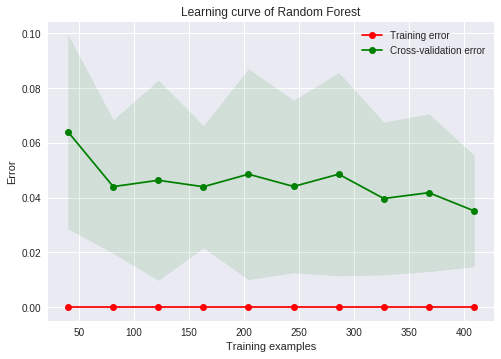

In [240]:
randomForest = RandomForestClassifier(n_estimators = n_estimators,
                                     max_features = max_features,
                                     max_depth = max_depth,
                                     min_samples_split = min_samples_split,
                                     min_samples_leaf = min_samples_leaf,
                                     bootstrap = bootstrap)
train_size=np.linspace(0.1,1, 10)
learning_curve_model(randomForest, "Random Forest", X_train, y_train, kfold, train_size)

In [241]:
randomForest.fit(X_train, y_train)
y_pred3 = randomForest.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.9385964912280702


This parameter set can be more comprehensive, but it slows down grid search

In [242]:
from sklearn import neural_network
neural_grid_params = {'solver': ['lbfgs'], 
                      'max_iter': [500,1000,1500], 
                      'alpha': 10.0 ** -np.arange(1, 7), 
                      'hidden_layer_sizes':np.arange(5, 12), 
                      'random_state':[0,1,2,3,4,5,6,7,8,9]}
grid_search_neural_network = grid_search_model(neural_network.MLPClassifier(), X_train, y_train, neural_grid_params, kfold)

Best Score: 0.9868131868131869  / Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': 10, 'max_iter': 500, 'random_state': 3, 'solver': 'lbfgs'}


This gives us best parameters for our model, look at this parameters.

In [243]:
grid_search_neural_network.best_params_

{'alpha': 0.01,
 'hidden_layer_sizes': 10,
 'max_iter': 500,
 'random_state': 3,
 'solver': 'lbfgs'}

With given parameters train neural network models and draw learning curve. I changed training size for analyzing plot better. Neural network model has the same training error with random forest model, their bias is same. It has higher variance than Random Forest also it has higher variance than SVM. Actually, at my first try I got different params and better learning curve. The last plot shows us there is no traning error, but I expected there was small training error. I added screenshot of previous result.
<img src="neural_network_first.png">

<module 'matplotlib.pyplot' from '/usr/lib/python3.7/site-packages/matplotlib/pyplot.py'>

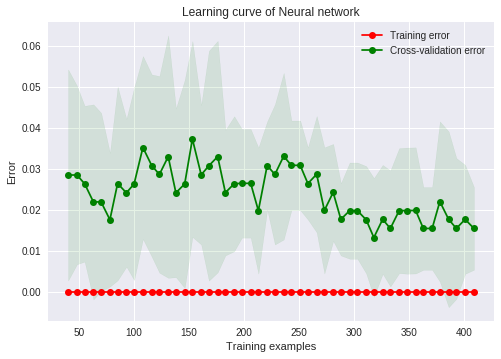

In [253]:
alpha = grid_search_neural_network.best_params_['alpha']
hidden_layer_sizes = grid_search_neural_network.best_params_['hidden_layer_sizes']
max_iter = grid_search_neural_network.best_params_['max_iter']
random_state = grid_search_neural_network.best_params_['random_state']
solver = grid_search_neural_network.best_params_['solver']

neuralNetwork = neural_network.MLPClassifier(alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, 
                                             max_iter=max_iter, random_state=random_state, solver=solver)
train_size=np.linspace(0.1,1, 50)
learning_curve_model(neuralNetwork, "Neural network", X_train, y_train, kfold, train_size)

In [251]:
neuralNetwork.fit(X_train, y_train)
y_pred4 = neuralNetwork.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.9473684210526315
